# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In this project, we analyze the sales data from an online retail store. We'll perform exploratory data analysis to gain insights into sales trends, customer behavior, and product performance.

Below are the libraries that are used in order to perform EDA (Exploratory data analysis) in this project


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [38]:
df = pd.read_excel("Online Retail.xlsx")
# To display the top 5 rows to check 
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Task 2: Data Cleaning
1. Check for the datatypes because sometime numerical data is stored as a string, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the Quantity data is already in integer format and UnitPrice is in float so nothing to worry.

In [39]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

Check the existing columns of the data-set

In [40]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


2. Dropping irrelevant columns, sometimes there would be many columns that we never use in such cases dropping is the only solution. In this case, the columns such as InvoiceNo and StockCode will not be used for presentation and will be dropped for this instance. From 8 columns now we will have 6.

In [41]:
# Check if the columns exist before dropping
if 'InvoiceNo' in df.columns and 'StockCode' in df.columns:
  # Drop the columns if they exist
  df = df.drop(['InvoiceNo', 'StockCode'], axis=1)
else:
  print("Columns 'InvoiceNo' and 'StockCode' are not found in the DataFrame.")

# Now you can proceed with using the modified df (if columns were dropped)
df.head(5)

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


3. Dropping duplicate rows. Rows often have some duplicate data which might affect data integrity, so here I remove all the duplicate value/rows from the data-set.

Check the total rows of data.

In [42]:
df.shape

(541909, 6)

In [43]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (6007, 6)


In [44]:
df.count()      # Used to count the number of rows

Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

Drop the duplicate rows.

In [45]:
df = df.drop_duplicates()
df.head(5)

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Count the current rows after dropping the duplicates. The values are still not match so we will check for other anomalies.

In [46]:
df.count()

Description    534532
Quantity       535902
InvoiceDate    535902
UnitPrice      535902
CustomerID     401528
Country        535902
dtype: int64

4. Dropping the missing or null values. Since Description column contains the name or detail of the product, it is important to have them as it may affect the data report. All rows with missing or null values in the Description column will be dropped. Currently there is 1370 rows of data without a description.

In [47]:
print(df.isnull().sum()) #check null values

Description      1370
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134374
Country             0
dtype: int64


After dropping the rows with column having a missing or null values, count the current rows of data. 

We can see all the columns have now the same number of data aside from the CustomerID. Dropping the rows with blank CustomerID would significantly reduce the amount of data available or record for sales. For the record I would retain the affected rows since all other columns are sufficient and consists of valuable data that will be leveraged in the report generation.

In [48]:
df = df.dropna(subset=['Description']) # Dropping the null values in Description column.
df.count()

Description    534532
Quantity       534532
InvoiceDate    534532
UnitPrice      534532
CustomerID     401528
Country        534532
dtype: int64

## Task 3: Basic Statistics
Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
And check for more possible anomalies.

In [49]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,534532.000000,534532.000000,401528.000000
mean,9.701713,4.644063,15281.185711
std,218.789309,97.424304,1714.034187
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16788.000000
max,80995.000000,38970.000000,18287.000000


As we can se we have negative value for both Quantity and UnitPrice column (presented by min).
We need to check and drop the rows with negative value since it will affect the integrity of our data.

In [50]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Check columns with negative values
negative_counts = (numeric_df < 0).sum()
print("Columns with negative values and their counts:")
print(negative_counts)

Columns with negative values and their counts:
Quantity      9719
UnitPrice        2
CustomerID       0
dtype: int64


In [51]:
# Drop rows with negative or zero values in 'Quantity' and 'unitPrice' columns
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

print("\nRemaining row counts per column:")
print(df.count())


Remaining row counts per column:
Description    524231
Quantity       524231
InvoiceDate    524231
UnitPrice      524231
CustomerID     392617
Country        524231
dtype: int64


In [52]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Check columns with zero values
zero_counts = (numeric_df == 0).sum()
print("Columns with zero values and their counts:")
print(zero_counts)

Columns with zero values and their counts:
Quantity      0
UnitPrice     0
CustomerID    0
dtype: int64


## Task 4: Perform Data Visualization
Use existing data or generate new reports from the data-set and present it using visualization.

In [53]:
# Add a temporary 'Sales' column that multiplies 'Quantity' and 'unitPrice'
df['Sales'] = df['Quantity'] * df['UnitPrice']

# Print the DataFrame with the new 'Sales' column
print("DataFrame with the new 'Sales' column:")
df.head(5)

DataFrame with the new 'Sales' column:


,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [54]:
df.Country.value_counts() #No. of order transactions per country

United Kingdom          479341
Germany                   9024
France                    8392
EIRE                      7879
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1958
Portugal                  1492
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     602
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     291
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon 

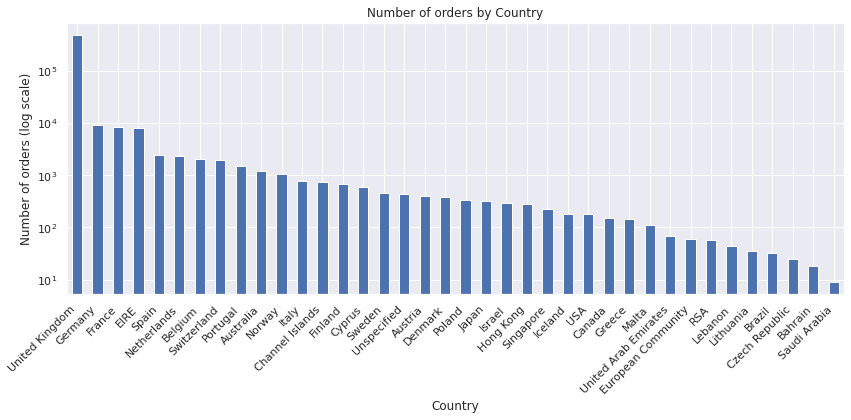

In [55]:
# Calculate number of orders per country
country_counts = df['Country'].value_counts().nlargest(40)

# Adjust figure size and plot the data
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', logy=True)  # Use logarithmic scale
plt.title("Number of orders by Country")
plt.ylabel('Number of orders (log scale)')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

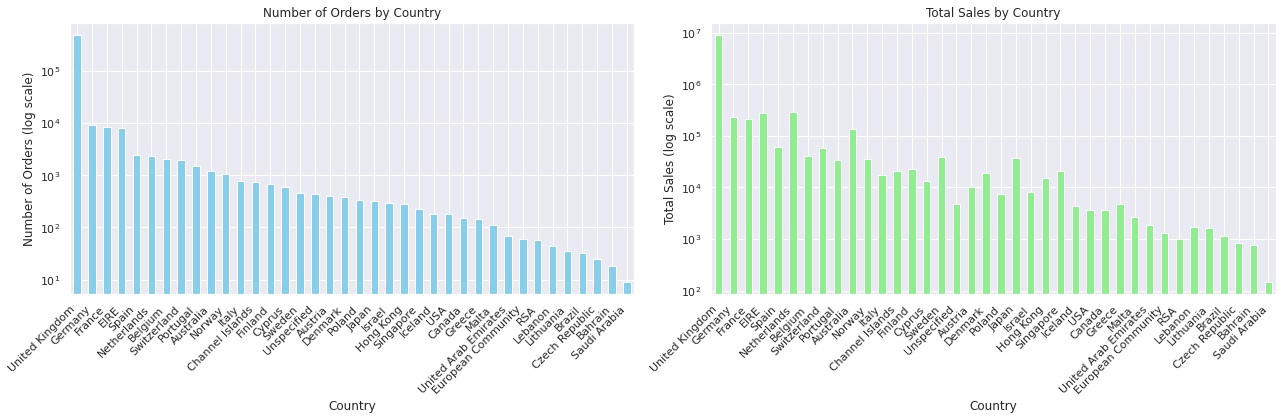

In [56]:
# Calculate number of orders per country
order_counts = df['Country'].value_counts().nlargest(40)

# Calculate total sales per country
sales_per_country = df.groupby('Country')['Sales'].sum().loc[order_counts.index]

# Adjust figure size and plot the data
plt.figure(figsize=(18, 6))

# Plot number of orders
plt.subplot(1, 2, 1)
order_counts.plot(kind='bar', logy=True, color='skyblue')
plt.title("Number of Orders by Country")
plt.ylabel('Number of Orders (log scale)')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')

# Plot total sales
plt.subplot(1, 2, 2)
sales_per_country.plot(kind='bar', logy=True, color='lightgreen')
plt.title("Total Sales by Country")
plt.ylabel('Total Sales (log scale)')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

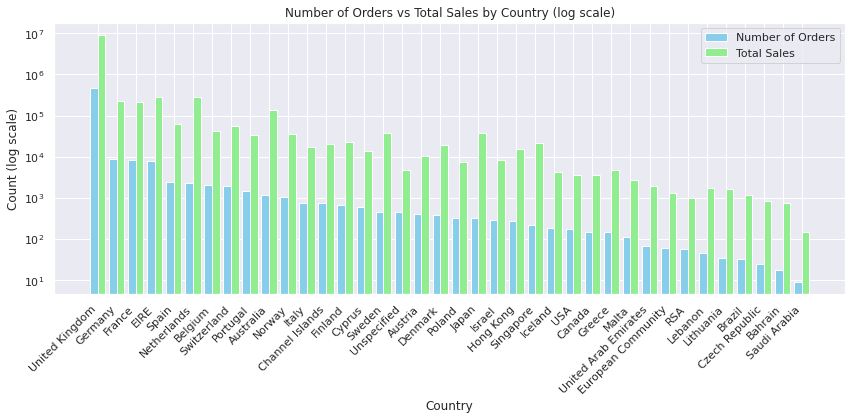

In [57]:
# Calculate number of orders per country
order_counts = df['Country'].value_counts().nlargest(40)

# Calculate total sales per country
sales_per_country = df.groupby('Country')['Sales'].sum().loc[order_counts.index]

# Adjust figure size and plot the data
plt.figure(figsize=(12, 6))

# Define the width of each bar
bar_width = 0.4

# Create an array of indices for the x-axis
x = np.arange(len(order_counts))

# Plot number of orders
plt.bar(x - bar_width/2, order_counts, width=bar_width, color='skyblue', label='Number of Orders', log=True)

# Plot total sales
plt.bar(x + bar_width/2, sales_per_country, width=bar_width, color='lightgreen', label='Total Sales', log=True)

# Set x-axis ticks and labels
plt.xticks(x, order_counts.index, rotation=45, ha='right')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Count (log scale)')
plt.title('Number of Orders vs Total Sales by Country (log scale)')
plt.legend()

plt.tight_layout()
plt.show()

Summary of Findings
Dominant Market: The United Kingdom is by far the largest market, with 479,341 order transactions, significantly higher than any other country. This indicates a strong domestic market presence.

Key International Markets: Germany (9,024), France (8,392), and EIRE (7,879) follow as the next largest markets. These countries represent critical international markets for our business.

Emerging Markets: Countries like Spain (2,479), Netherlands (2,359), and Belgium (2,031) show moderate order volumes, suggesting potential areas for growth and targeted marketing efforts.

Diverse Customer Base: The data reveals a diverse customer base spread across multiple countries, including non-European markets like Australia (1,181), USA (179), and Japan (321). This diversity highlights the global reach of our online retail operations.

## Task 5: Explore the top-selling products
Explore the top-selling products and countries based on the quantity sold.

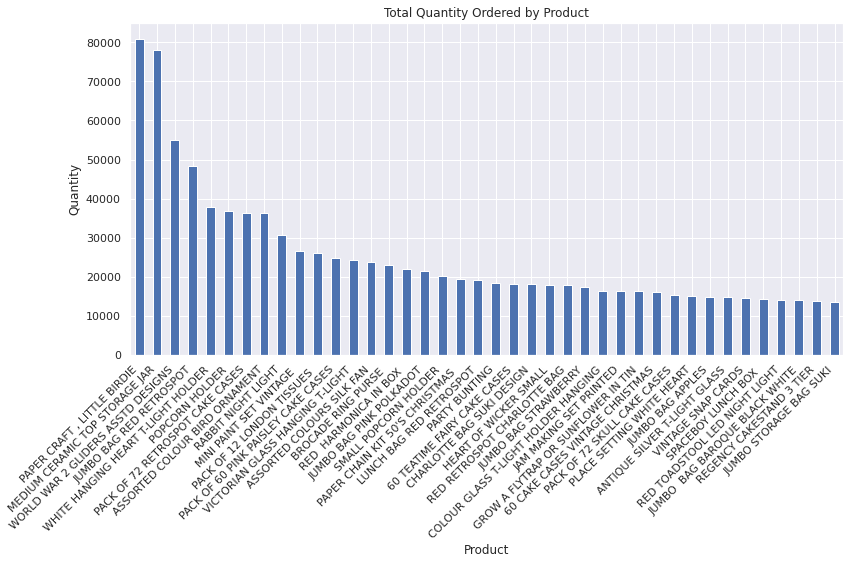

In [58]:
# Calculate total quantity per product description
quantity_per_description = df.groupby('Description')['Quantity'].sum().nlargest(40)

# Plot the data
plt.figure(figsize=(12, 8))
quantity_per_description.plot(kind='bar')
plt.title("Total Quantity Ordered by Product")
plt.ylabel('Quantity')
plt.xlabel('Product')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [59]:
quantity_per_description = df.groupby('Description')['Quantity'].sum().nlargest(40)
print(quantity_per_description)

Description
PAPER CRAFT , LITTLE BIRDIE            80995
MEDIUM CERAMIC TOP STORAGE JAR         78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS      54951
JUMBO BAG RED RETROSPOT                48349
WHITE HANGING HEART T-LIGHT HOLDER     37869
POPCORN HOLDER                         36745
PACK OF 72 RETROSPOT CAKE CASES        36396
ASSORTED COLOUR BIRD ORNAMENT          36362
RABBIT NIGHT LIGHT                     30737
MINI PAINT SET VINTAGE                 26633
PACK OF 12 LONDON TISSUES              26119
PACK OF 60 PINK PAISLEY CAKE CASES     24814
VICTORIAN GLASS HANGING T-LIGHT        24275
ASSORTED COLOURS SILK FAN              23826
BROCADE RING PURSE                     23020
RED  HARMONICA IN BOX                  21903
JUMBO BAG PINK POLKADOT                21413
SMALL POPCORN HOLDER                   20142
PAPER CHAIN KIT 50'S CHRISTMAS         19329
LUNCH BAG RED RETROSPOT                19227
PARTY BUNTING                          18282
60 TEATIME FAIRY CAKE CASES            1818

Top-Selling Products
The top-selling products, based on the total quantity ordered, include:

PAPER CRAFT, LITTLE BIRDIE: 80,995 units
MEDIUM CERAMIC TOP STORAGE JAR: 78,033 units
WORLD WAR 2 GLIDERS ASSTD DESIGNS: 54,951 units
JUMBO BAG RED RETROSPOT: 48,349 units
WHITE HANGING HEART T-LIGHT HOLDER: 37,869 units

These items demonstrate significant sales volumes, indicating high demand. Products such as paper crafts and storage jars suggest a preference for decorative and practical items.

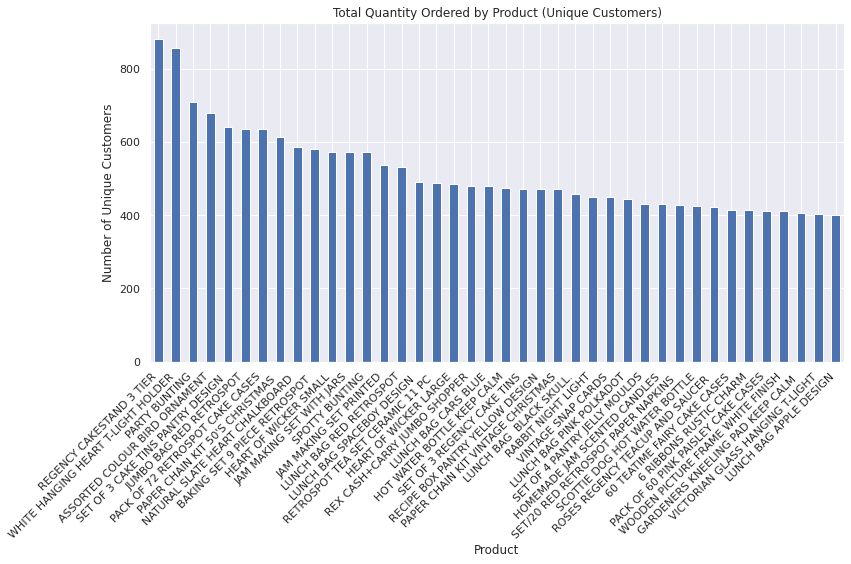

In [60]:
# Calculate total quantity per product description per unique customer
quantity_per_description_customer = df.groupby(['Description', 'CustomerID'])['Quantity'].sum().reset_index()

# Calculate total quantity per product description based on unique customers
quantity_per_description_unique_customers = quantity_per_description_customer.groupby('Description').size().nlargest(40)

# Plot the data
plt.figure(figsize=(12, 8))
quantity_per_description_unique_customers.plot(kind='bar')
plt.title("Total Quantity Ordered by Product (Unique Customers)")
plt.ylabel('Number of Unique Customers')
plt.xlabel('Product')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [73]:
quantity_per_description_unique_customers = quantity_per_description_customer.groupby('Description').size().nlargest(40)
print(quantity_per_description_unique_customers)

Description
REGENCY CAKESTAND 3 TIER               881
WHITE HANGING HEART T-LIGHT HOLDER     856
PARTY BUNTING                          708
ASSORTED COLOUR BIRD ORNAMENT          678
SET OF 3 CAKE TINS PANTRY DESIGN       640
JUMBO BAG RED RETROSPOT                635
PACK OF 72 RETROSPOT CAKE CASES        635
PAPER CHAIN KIT 50'S CHRISTMAS         613
NATURAL SLATE HEART CHALKBOARD         587
BAKING SET 9 PIECE RETROSPOT           581
HEART OF WICKER SMALL                  573
JAM MAKING SET WITH JARS               573
SPOTTY BUNTING                         571
JAM MAKING SET PRINTED                 537
LUNCH BAG RED RETROSPOT                532
LUNCH BAG SPACEBOY DESIGN              490
RETROSPOT TEA SET CERAMIC 11 PC        488
HEART OF WICKER LARGE                  485
REX CASH+CARRY JUMBO SHOPPER           480
LUNCH BAG CARS BLUE                    479
HOT WATER BOTTLE KEEP CALM             474
SET OF 3 REGENCY CAKE TINS             472
RECIPE BOX PANTRY YELLOW DESIGN        471

Top Products by Unique Customers
When considering the total quantity ordered by unique customers, we observe the following:

REGENCY CAKESTAND 3 TIER: 881 unique customers
WHITE HANGING HEART T-LIGHT HOLDER: 856 unique customers
PARTY BUNTING: 708 unique customers
ASSORTED COLOUR BIRD ORNAMENT: 678 unique customers
SET OF 3 CAKE TINS PANTRY DESIGN: 640 unique customers

These products are not only popular in terms of total quantity sold but also widely purchased by individual customers. This suggests that these items have broad appeal across the customer base.

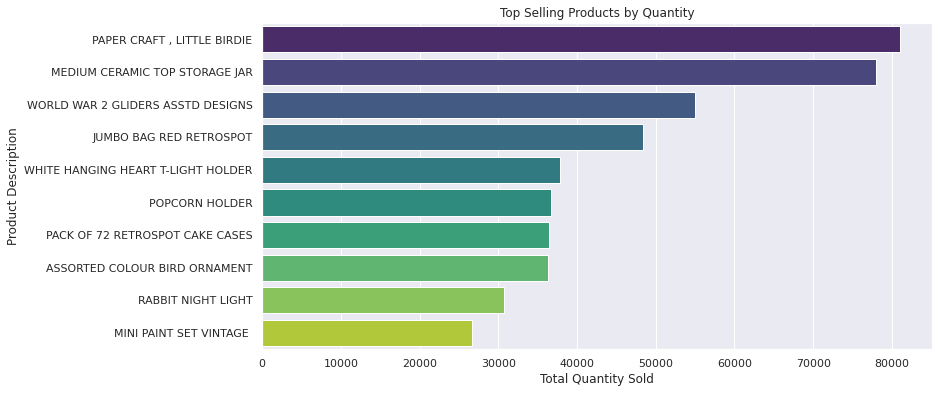

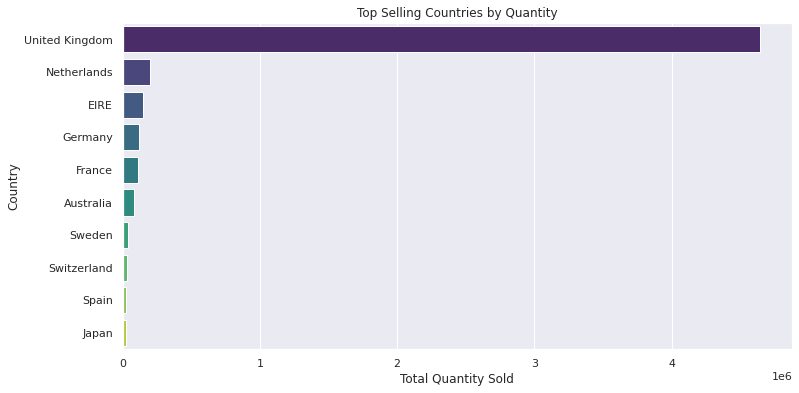

In [61]:
# Calculate total quantity sold per product
quantity_per_product = df.groupby('Description')['Quantity'].sum().nlargest(10)

# Plot the top-selling products
plt.figure(figsize=(12, 6))
sns.barplot(x=quantity_per_product.values, y=quantity_per_product.index, palette='viridis')
plt.title('Top Selling Products by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.show()

# Calculate total quantity sold per country
quantity_per_country = df.groupby('Country')['Quantity'].sum().nlargest(10)

# Plot the top-selling countries
plt.figure(figsize=(12, 6))
sns.barplot(x=quantity_per_country.values, y=quantity_per_country.index, palette='viridis')
plt.title('Top Selling Countries by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Country')
plt.show()

## Task 6: Analyze the sales trends over tim
Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.

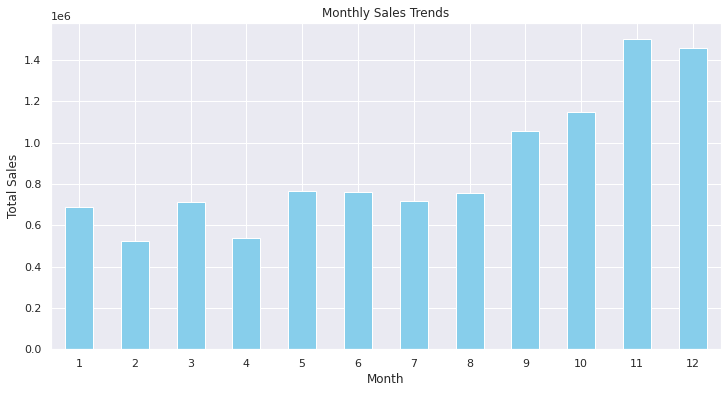

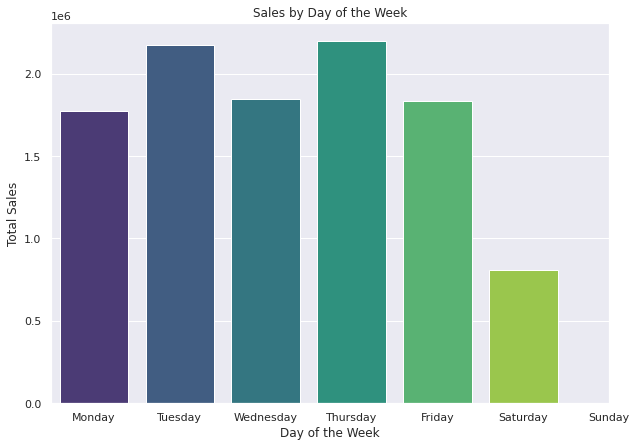

In [62]:
# Convert 'InvoiceDate' column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month and day of the week
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Group by month and calculate total sales
monthly_sales = df.groupby('Month')['Sales'].sum()

# Plot monthly sales
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

# Group by day of the week and calculate total sales
dayofweek_sales = df.groupby('DayOfWeek')['Sales'].sum()

plt.figure(figsize=(10, 7))
sns.barplot(x=dayofweek_sales.index, y=dayofweek_sales.values, palette='viridis')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

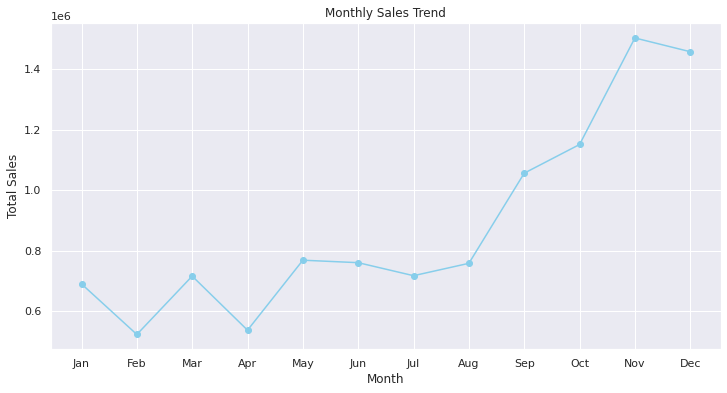

In [63]:
# Convert 'InvoiceDate' column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %I:%M:%S %p')

# Extract month and year
df['Month'] = df['InvoiceDate'].dt.month
# df['Year'] = df['InvoiceDate'].dt.year

# Group by month and year, and calculate total sales
monthly_sales = df.groupby(['Month'])['Sales'].sum()

# Plot monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='skyblue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [64]:
monthly_sales = df.groupby(['Month'])['Sales'].sum()
print(monthly_sales)

Month
1      689673.220
2      522289.220
3      715491.910
4      536509.771
5      768148.040
6      759952.300
7      716872.781
8      757831.380
9     1056215.622
10    1151153.570
11    1503807.070
12    1458283.260
Name: Sales, dtype: float64


In [65]:
dayofweek_sales = df.groupby('DayOfWeek')['Sales'].sum()
print(dayofweek_sales)

DayOfWeek
0    1774351.901
1    2173101.571
2    1846356.250
3    2199025.510
4    1836659.181
6     806733.731
Name: Sales, dtype: float64


In [66]:
monthly_orders = df.groupby('Month')['Sales'].count()
print(monthly_orders)

Month
1     34038
2     26842
3     35401
4     28820
5     35779
6     35626
7     38352
8     34263
9     48894
10    58511
11    81996
12    65709
Name: Sales, dtype: int64


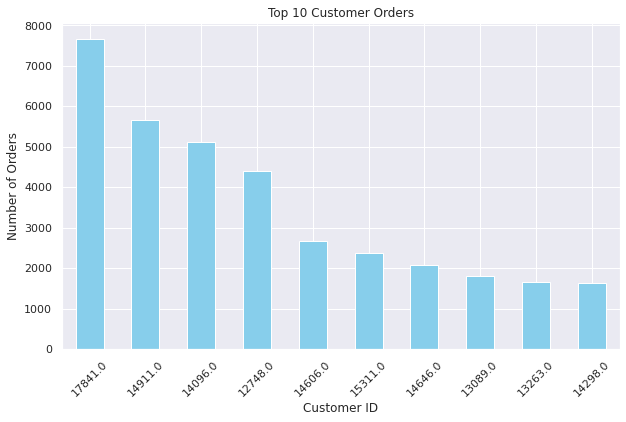

In [67]:
# Calculate the top 10 customer orders
customer_orders = df['CustomerID'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
customer_orders.plot(kind='bar', color='skyblue')
plt.title('Top 10 Customer Orders')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

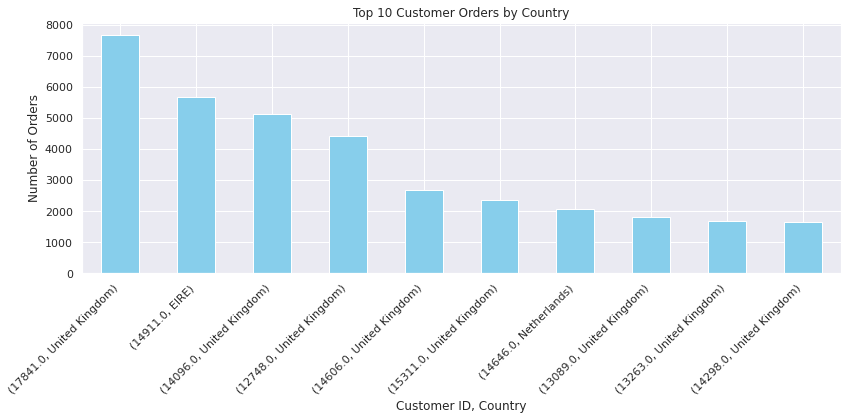

In [68]:
# Calculate the top 10 customer orders
top_customer_orders = df.groupby(['CustomerID', 'Country']).size().nlargest(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_customer_orders.plot(kind='bar', color='skyblue')
plt.title('Top 10 Customer Orders by Country')
plt.xlabel('Customer ID, Country')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Task 7: Identify any outliers or anomalies
Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.

Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.

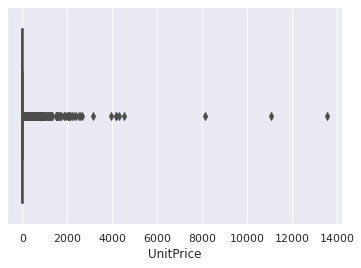

In [69]:
sns.boxplot(x=df['UnitPrice'])

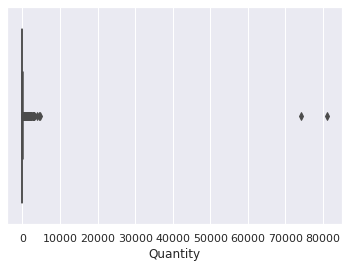

In [70]:
sns.boxplot(x=df['Quantity'])

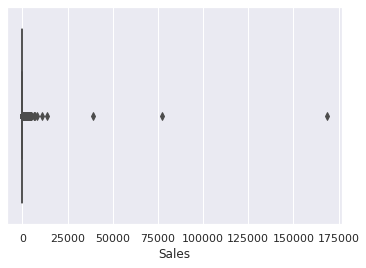

In [71]:
sns.boxplot(x=df['Sales'])

In [72]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Quantity        10.00
UnitPrice        2.88
CustomerID    2836.00
Sales           13.80
Month            6.00
DayOfWeek        3.00
dtype: float64


## Task 8: Conclusion and Summary
Draw conclusions and summarize your findings from the exploratory data analysis

Sales Trend

The analysis reveals a noticeable fluctuation in monthly sales throughout the year, with peaks and troughs observed across different months. Sales generally exhibit an upward trend from January to November, with a significant increase in sales during the latter part of the year. December stands out as the month with the highest total sales, likely influenced by holiday shopping and end-of-year promotions. Despite fluctuations, overall sales trend upwards over the course of the year, indicating a positive growth trajectory for the business.

Seasonal Patterns

The observed sales trends indicate potential seasonal patterns, with certain months experiencing higher sales volumes compared to others. The significant increase in sales during the holiday season, particularly in November and December, suggests that the business may benefit from strategic marketing campaigns and promotions targeting holiday shoppers. Understanding and leveraging seasonal patterns can help the business optimize inventory management, marketing strategies, and resource allocation to capitalize on periods of high demand and maximize revenue potential.

Sales Data Summary

Monthly sales figures range from approximately 522,289 in February to over 1.5 million in both November and December, highlighting the substantial variability in sales across different months. Similarly, the number of orders per month varies considerably, with January having the lowest number of orders (34,038) and November and December having the highest number of orders (81,996 and 65,709, respectively). The correlation between sales and the number of orders suggests that while the average order value may fluctuate, overall sales are driven by both the volume and value of orders placed.

Geographical Analysis

The geographic analysis of order transactions highlights the United Kingdom as the primary market with a substantial lead in order volume. However, significant opportunities exist in key international markets such as Germany, France, and EIRE. Understanding these geographic trends can inform strategic decisions in marketing, inventory distribution, and customer service to further capitalize on both established and emerging markets.

Outliers and Anomaly

1. Unusual Large Order: You have an order for a single item with a large quantity and price. This could be a legitimate purchase or a potential anomaly requiring investigation.

2. Missing Customer IDs: A significant number of rows (thousands) are missing customer IDs. This missing data can affect the reliability of your analysis.

Limitations & Next Steps

1. Missing data (customer IDs) limits customer analysis.
2. Monthly data limits insights. Consider weekly/daily analysis.
3. Large order needs investigation to avoid skewing results.

Further research:

1. Segment customers (if possible) to understand buying behaviors.
2. Deep dive into seasonality: identify sales drivers, forecast future trends.
3. Analyze profitability beyond just sales.
4. The geographic analysis identified potential in Germany, France, and EIRE. Further research could delve deeper into these markets, such as analyzing customer preferences, competitor landscape, and marketing effectiveness for these regions.